# Importing Python Libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Importing our dataset

In [6]:
dataset = pd.read_csv("/Users/sameedsajid/Downloads/seeds_dataset (1).txt", sep = "\t", header = None,
                     names = ["area", "parameter", "compactness",
                              "length","width","asycoef","groove_length","seed_type"])

In [7]:
dataset.head()

,area,parameter,compactness,length,width,asycoef,groove_length,seed_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
dataset.shape

(210, 8)

In [8]:
dataset.isnull().sum()

area             0
parameter        0
compactness      0
length           0
width            0
asycoef          0
groove_length    0
seed_type        0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   parameter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asycoef        210 non-null    float64
 6   groove_length  210 non-null    float64
 7   seed_type      210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [10]:
dataset["seed_type"].value_counts()

1    70
2    70
3    70
Name: seed_type, dtype: int64

In [11]:
dataset.describe()

,area,parameter,compactness,length,width,asycoef,groove_length,seed_type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [8]:
scaler = StandardScaler()
scaler.fit(dataset)

data = pd.DataFrame(scaler.transform(dataset), index=dataset.index, columns=dataset.columns)

In [9]:
data

,area,parameter,compactness,length,width,asycoef,groove_length,seed_type
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,-1.224745
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,-1.224745
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,-1.224745
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,-1.224745
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,-1.224745
...,...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413,1.224745
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,1.224745
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060,1.224745
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535,1.224745


In [10]:
x = data.iloc[:,:7]

In [11]:
y = dataset.iloc[:,7]

In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: seed_type, Length: 210, dtype: int64

In [196]:
y.array

<PandasArray>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 ...
 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Length: 210, dtype: int64

In [21]:
print(x.shape)

print(y.shape)


(210, 7)
(210,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 7)
(105, 7)
(105,)
(105,)


# Data Visualization

In [202]:
X = dataset.iloc[:,0:2]
y = dataset.iloc[:,7]

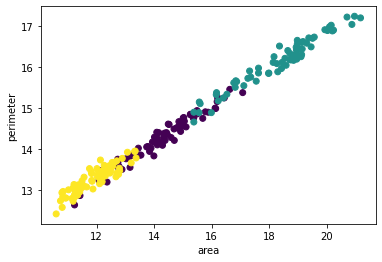

In [53]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y) 
plt.xlabel('area') 
plt.ylabel('perimeter') 
plt.show() 

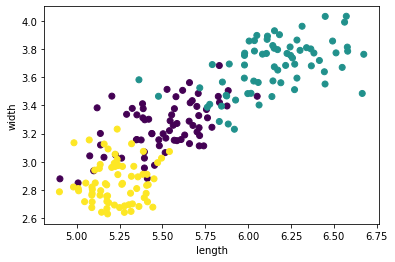

In [36]:
X = dataset.iloc[:,3:5]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y) 
plt.xlabel('length') 
plt.ylabel('width') 
plt.show() 

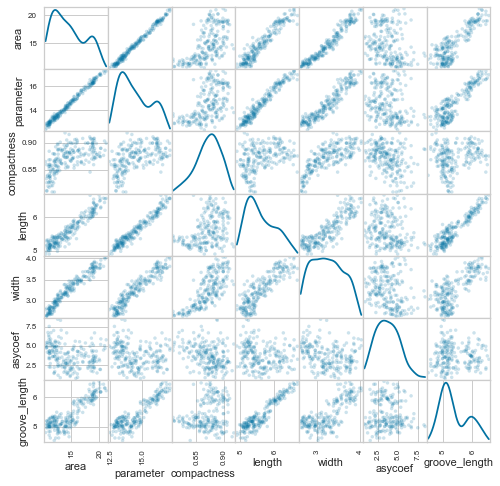

In [165]:
from pandas.plotting import scatter_matrix
scatter_matrix(x, alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

<AxesSubplot:>

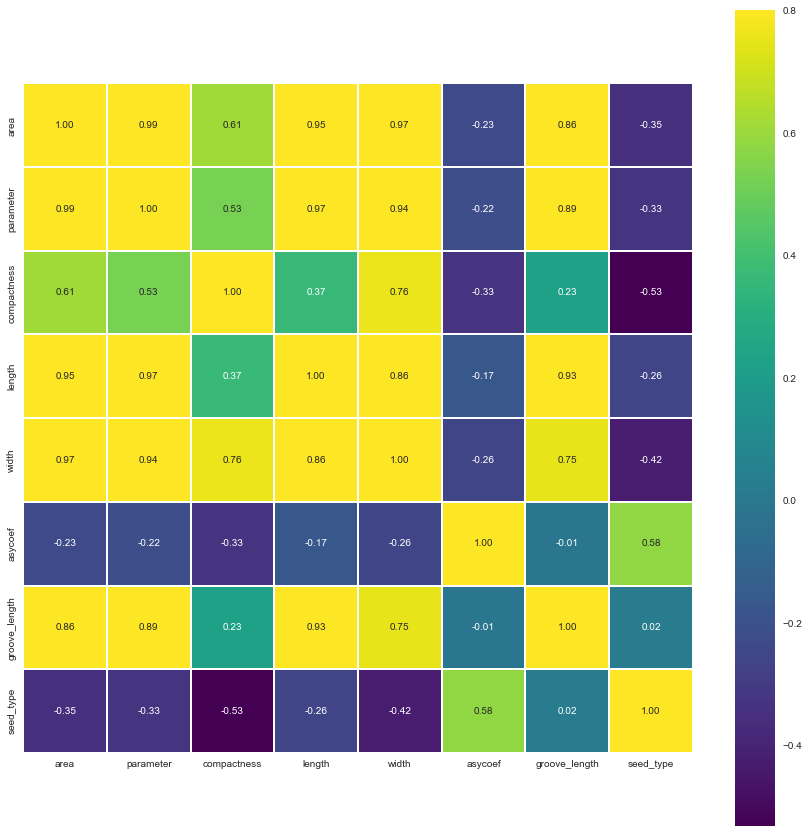

In [63]:
colormap = plt.cm.viridis
cor = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

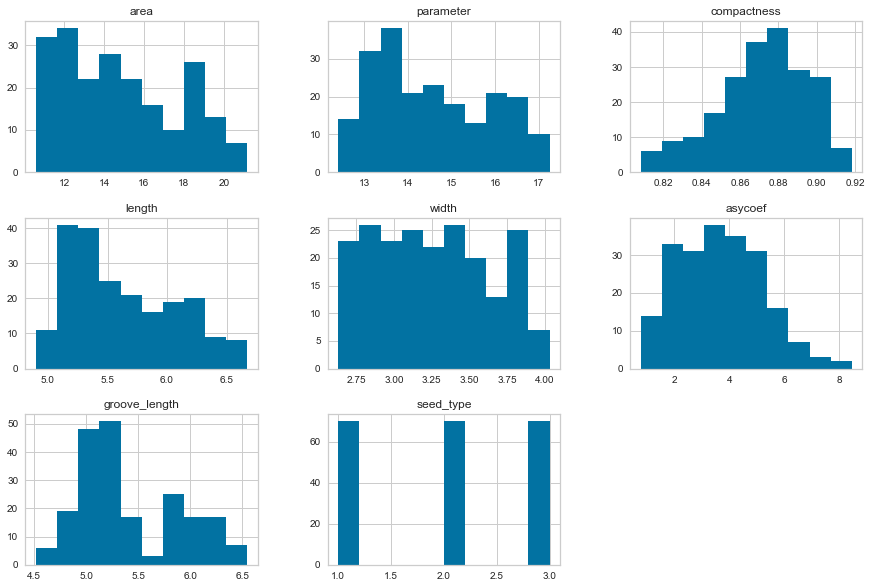

In [64]:
dataset.hist(figsize=(15,10))
plt.show()

# Modelling

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Logistic Regression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(x_train,y_train)

predictions = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

confusion_matrix(y_test,predictions)

print(classification_report(y_test,predictions))

training accuracy : 0.9428571428571428
testing accuracy : 0.9619047619047619
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        37
           2       0.97      0.97      0.97        35
           3       0.97      0.97      0.97        33

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

confusion_matrix(y_test,predictions)

print(classification_report(y_test,predictions))

training accuracy : 1.0
testing accuracy : 0.9428571428571428
              precision    recall  f1-score   support

           1       0.90      0.95      0.92        37
           2       1.00      0.97      0.99        35
           3       0.94      0.91      0.92        33

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



# Support Vector Machines

In [18]:

from sklearn.svm import SVC

model = SVC(C = 5)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

confusion_matrix(y_test,predictions)



training accuracy : 0.9714285714285714
testing accuracy : 0.9142857142857143


array([[27,  5,  1],
       [ 0, 38,  0],
       [ 3,  0, 31]])

<AxesSubplot:>

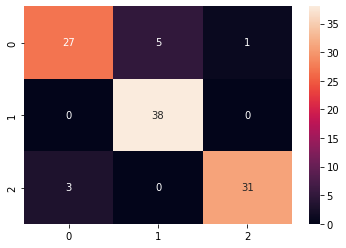

In [20]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        33
           2       0.88      1.00      0.94        38
           3       0.97      0.91      0.94        34

    accuracy                           0.91       105
   macro avg       0.92      0.91      0.91       105
weighted avg       0.92      0.91      0.91       105



# Decision Trees

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))
confusion_matrix(y_test,predictions)




training accuracy : 1.0
testing accuracy : 0.8952380952380953


array([[28,  3,  2],
       [ 0, 38,  0],
       [ 6,  0, 28]])

<AxesSubplot:>

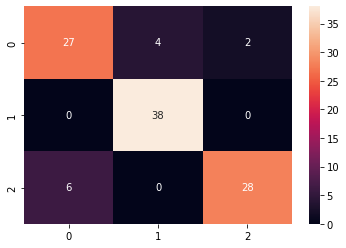

In [26]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True)

In [35]:
accuracy_score(y_test,predictions)



0.8952380952380953

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        37
           2       1.00      0.91      0.96        35
           3       0.94      0.97      0.96        33

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



# Cross Validation Scores

In [49]:
cross_val_score(SVC(),x,y)

array([0.97619048, 0.95238095, 0.92857143, 0.95238095, 0.76190476])

In [57]:
cross_val_score(RandomForestClassifier(n_estimators = 50),x,y)

array([0.92857143, 0.95238095, 0.97619048, 0.97619048, 0.73809524])

In [54]:
cross_val_score(DecisionTreeClassifier(),x,y)

array([0.9047619 , 0.88095238, 0.9047619 , 0.92857143, 0.83333333])

In [52]:
cross_val_score(LogisticRegression(),x,y)

array([0.97619048, 0.97619048, 0.92857143, 0.95238095, 0.78571429])